In [ ]:
#Question 1
import urllib.request
import io
import pandas as pd
url = "http://motioncore-umh.cs.umn.edu/4980/college.csv"
data = urllib.request.urlopen(url)
csv_bytes = data.read()
csv_string = csv_bytes.decode("utf8")
csv_data = io.StringIO(csv_string)
df = pd.read_csv(csv_data)
df["selective"] = (df.Top10perc > 50)
df["AllTrue"] = (df.Top10perc == df.Top10perc)
df["AllFalse"] = (df.Top10perc != df.Top10perc)
df

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,selective,AllTrue,AllFalse
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,2200,70,78,18.1,12,7041,60,False,True,False
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,1500,29,30,12.2,16,10527,56,False,True,False
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,1165,53,66,12.9,30,8735,54,False,True,False
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,875,92,97,7.7,37,19016,59,True,True,False
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,1500,76,72,11.9,2,10922,15,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,...,1200,60,60,21.0,14,4469,40,False,True,False
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,...,1250,73,75,13.3,31,9189,83,False,True,False
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,...,781,67,75,14.4,20,8323,49,False,True,False
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,...,2115,96,96,5.8,49,40386,99,True,True,False


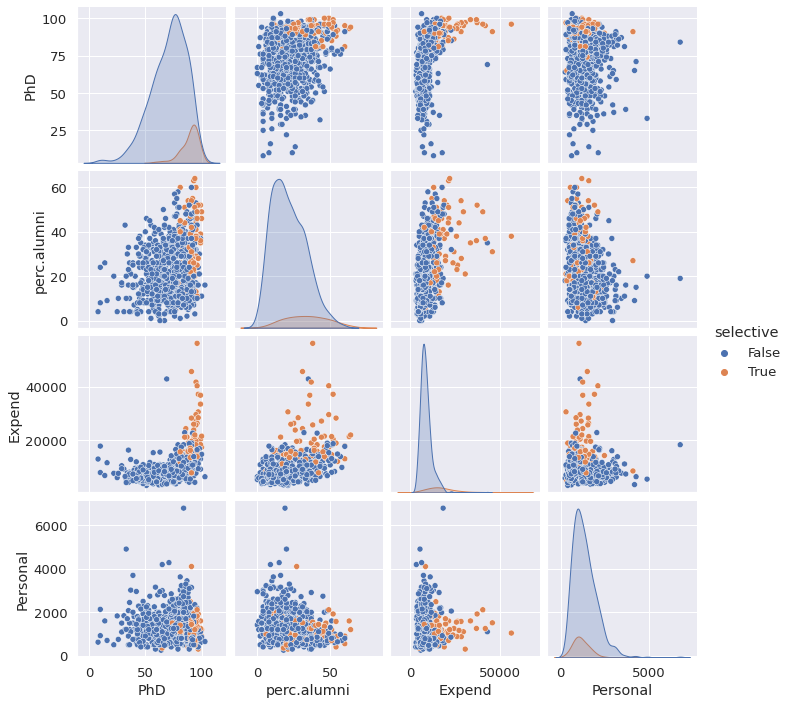

In [ ]:
import seaborn as sns
sns.set(font_scale=1.2)
sns.pairplot(df[["PhD", "perc.alumni", "Expend", "Personal", "selective"]], hue = "selective")

In [ ]:
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

X = df[["perc.alumni", "PhD"]].to_numpy() #change the classifiers here
y = df["selective"].to_numpy()

def train_test_split(X,y,test_size):   #code from class ipynb
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int(test_size*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  X_train = X_train/np.linalg.norm(X_train)
  X_test = X_test/np.linalg.norm(X_test)

  return X_train, X_test, y_train, y_test


def knn_classifier(X_train, y_train, X_test): #code from class ipynb
  # instantiate learning model and fit data
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # predict the response
  pred = knn.predict(X_test)
  return pred

def true_classifier(X_train, y_train, X_test):
  return True

def false_classifier(X_train, y_train, X_test):
  return False

def accuracy(classify, X_train, y_train, X_test, y_test): #code from class ipynb
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return (correct_pred.sum()/total_preds)




k = 2
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
accuracy(knn_classifier, X_train, y_train, X_test, y_test)





0.9021113243761996

In [ ]:
# def recall(classify, X_train, y_train, X_test, y_test):
#   pred = classify(X_train, y_train, X_test)
#   true_positive = ((pred == y_test) & (pred == True)).sum()
#   actually_positive = (y_test == True).sum()
#   return true_positive/actually_positive


# k = 2
# X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
# recall(knn_classifier, X_train, y_train, X_test, y_test)

In [ ]:
# def precision(classify, X_train, y_train, X_test, y_test):
#   pred = classify(X_train, y_train, X_test)
#   true_positive = ((pred == y_test) & (pred == True)).sum()
#   predicted_positive = (pred == True).sum()
#   return true_positive/predicted_positive

# # def precision_forallT(classify, X_train, y_train, X_test, y_test):
# #   pred = classify(X_train, y_train, X_test)
# #   true_positive = ((pred == y_test) & (pred == True)).sum()
# #   predicted_positive = y_test.sum()
# #   return true_positive/predicted_positive

# # def precision_forallf(classify, X_train, y_train, X_test, y_test):
# #   pred = classify(X_train, y_train, X_test)
# #   true_positive = ((pred == y_test) & (pred == True)).sum()
# #   predicted_positive = 0
# #   return true_positive/predicted_positive

# k = 2
# X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
# precision(knn_classifier, X_train, y_train, X_test, y_test)

In [ ]:
# def f1_score(classify, X_train, y_train, X_test, y_test):
#   p = precision(classify, X_train, y_train, X_test, y_test)
#   r = recall(classify, X_train, y_train, X_test, y_test)
#   return 2 * (p * r) / (p + r)

# # def f1_score_forallt(classify, X_train, y_train, X_test, y_test):
# #   p = precision_forallT(classify, X_train, y_train, X_test, y_test)
# #   r = recall(classify, X_train, y_train, X_test, y_test)
# #   return 2 * (p * r) / (p + r)

# k = 2
# X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
# f1_score(knn_classifier, X_train, y_train, X_test, y_test)


In [ ]:
# k = 2
# X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
# test_acc = accuracy(knn_classifier, X_train, y_train, X_test, y_test)
# train_acc = accuracy(knn_classifier, X_train, y_train, X_train, y_train)

# print(test_acc)
# print(train_acc)

# test_rec = recall(knn_classifier, X_train, y_train, X_test, y_test)
# train_rec = recall(knn_classifier, X_train, y_train, X_train, y_train)

# print(test_rec)
# print(train_rec)

# test_prec = precision(knn_classifier, X_train, y_train, X_test, y_test)
# train_prec = precision(knn_classifier, X_train, y_train, X_train, y_train)

# print(test_prec)
# print(train_prec)

# test_f1 = f1_score(knn_classifier, X_train, y_train, X_test, y_test)
# train_f1 = f1_score(knn_classifier, X_train, y_train, X_train, y_train)

# print(test_f1)
# print(train_f1)



In [ ]:
# k = 20
# X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
# test_acc = accuracy(false_classifier, X_train, y_train, X_test, y_test)
# train_acc = accuracy(false_classifier, X_train, y_train, X_train, y_train)

# print(test_acc)
# print(train_acc)

# test_rec = recall(false_classifier, X_train, y_train, X_test, y_test)
# train_rec = recall(false_classifier, X_train, y_train, X_train, y_train)

# print(test_rec)
# print(train_rec)

# test_prec = precision(false_classifier, X_train, y_train, X_test, y_test)
# train_prec = precision(false_classifier, X_train, y_train, X_train, y_train)

# print(test_prec)
# print(train_prec)

# test_f1 = f1_score(false_classifier, X_train, y_train, X_test, y_test)
# train_f1 = f1_score(false_classifier, X_train, y_train, X_train, y_train)

# print(test_f1)
# print(train_f1)

In [ ]:
# k = 20
# X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
# test_acc = accuracy(true_classifier, X_train, y_train, X_test, y_test)
# train_acc = accuracy(true_classifier, X_train, y_train, X_train, y_train)

# print(test_acc)
# print(train_acc)

# test_rec = recall(true_classifier, X_train, y_train, X_test, y_test)
# train_rec = recall(true_classifier, X_train, y_train, X_train, y_train)

# print(test_rec)
# print(train_rec)

# test_prec = precision_forallT(true_classifier, X_train, y_train, X_test, y_test)
# train_prec = precision_forallT(true_classifier, X_train, y_train, X_train, y_train)

# print(test_prec)
# print(train_prec)

# test_f1 = f1_score_forallt(true_classifier, X_train, y_train, X_test, y_test)
# train_f1 = f1_score_forallt(true_classifier, X_train, y_train, X_train, y_train)

# print(test_f1)
# print(train_f1)



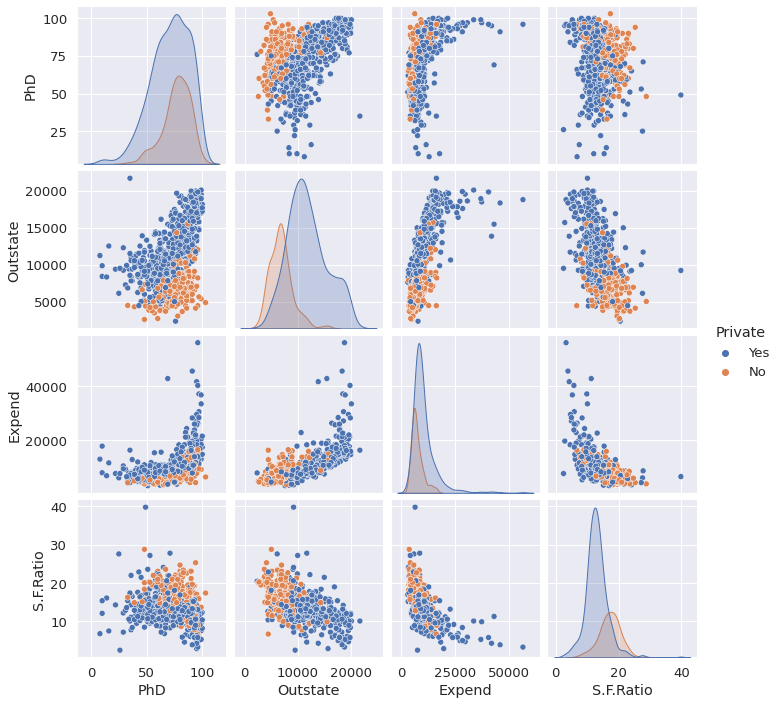

In [ ]:
sns.pairplot(df[["PhD", "Outstate", "Expend", "S.F.Ratio","Private"]], hue = "Private") #question 5

In [ ]:
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

features = df[["Personal",	"PhD","S.F.Ratio",	"Expend",	"Grad.Rate"]].to_numpy()
label = df["selective"].to_numpy()
np.set_printoptions(suppress=True)

def distance(p0, p1):
  'Computes squared euclidean distance'
  return np.sum( (p0-p1)**2 )

test_feature = np.array([1200, 84, 12, 15700, 78]) #hypothetical university
known_features = features[:,0:5]
dists = np.array([distance(t, test_feature) for t in known_features])
idx = np.argpartition(dists, 21) # getting the 21 nearest neighbors
print(dists[idx[:21]])

[ 14620.69 189725.24 245284.25 104689.24 526174.64 356076.01 279329.29
 485490.16 659110.25 166744.04   8679.76 114697.25 436984.81  19200.56
  37299.61 248372.25 597232.04 804087.61 511487.84 152504.25 851973.84]


In [ ]:
nearest = dists.argmin()
label[nearest]

True

In [ ]:
np.where(dists == 12325790.25)[0]
# np.where(dists == 13126971.76)[0]
# np.where(dists == 14782644.56)[0]
label[np.where(dists ==  804087.61)[0]] #label each of the neighbors and count the responses


array([False])